In [1]:
from dilithium import Dilithium2
from dilithium import Dilithium3
from dilithium import Dilithium5

# Example of signing
pk, sk = Dilithium2.keygen()
msg = b"Hello"
sig = Dilithium2.sign(sk, msg)

In [2]:
print(msg)

b'Hello'


In [4]:
#Verificando la firmas
print("Verificación con el mensaje",msg," : ",Dilithium2.verify(pk, msg, sig))
msg1=b"b"
print("Verificación con el mensaje",msg1," : ",Dilithium2.verify(pk, msg1, sig))

Verificación con el mensaje b'Hello'  :  True
Verificación con el mensaje b'b'  :  False


In [5]:
#Generación de nuevas firmas
pk_new, sk_new = Dilithium2.keygen()
print("Verificación con las nuevas firmas: ",Dilithium2.verify(pk_new, msg, sig))

Verificación con las nuevas firmas:  False


In [6]:
import time
mensajes=[b"Sol y mar.",b"Cielo azul y sol.",b"Amigos disfrutan el dia juntos.",b"La musica suena en la noche, creando recuerdos inolvidables.",b"En la vasta pradera, los caballos galopan libremente mientras el viento sopla suavemente.",b"En el tranquilo pueblo costero, las olas rompen suavemente en la playa dorada, creando un paisaje de serenidad.",b"Bajo el cielo estrellado, un poeta inspirado escribe versos que capturan la belleza y la melancolia de la noche, mientras que los corazones sensibles encuentran consuelo en sus palabras.",b"A traves de los siglos, la humanidad ha forjado su camino, enfrentando desafios y celebrando triunfos, tejiendo historias que quedan grabadas en el tejido del tiempo, como un testimonio de nuestra existencia en este vasto universo."]


In [24]:
llaves=[]
firmas=[]
verificacion=[]
#for i in range(len(mensajes)):


for i in range(len(mensajes)):
    print("***********************************************************")
    print("\t\t\t Para el mensaje número ",i)
    print(mensajes[i])
    
    llave_tiempo       =[]
    firma_tiempo       =[]
    verificacion_tiempo=[]

    print("Con el nivel de seguridad Dilithium 2")
    inicio=time.time()
    pk,sk = Dilithium2.keygen()
    fin=time.time()
    llave_tiempo.append(-inicio+fin)
    print("El tiempo que tomó la generación de las llaves: ",-inicio+fin)
        
    inicio=time.time()
    
    sig = Dilithium2.sign(sk, mensajes[i])
    fin=time.time()
    firma_tiempo.append(-inicio+fin)
    print("El tiempo que tomó firmar el mensaje: ",-inicio+fin)
        
    inicio=time.time()
    veri=Dilithium2.verify(pk, mensajes[i], sig)
    if veri==False:
        print("La verificación falló")
        break
    fin=time.time()
    verificacion_tiempo.append(-inicio+fin)
    print("La verificación fue: ",veri)
    print("El tiempo de la verificación fue de: ",-inicio+fin)
        
        
    print("Con el nivel de seguridad Dilithium 3")
    inicio=time.time()
    pk,sk = Dilithium3.keygen()
    fin=time.time()
    llave_tiempo.append(-inicio+fin)
    print("El tiempo que tomó la generación de las llaves: ",-inicio+fin)
        
    inicio=time.time()
    
    sig = Dilithium3.sign(sk, mensajes[i])
    fin=time.time()
    firma_tiempo.append(-inicio+fin)
    print("El tiempo que tomó firmar el mensaje: ",-inicio+fin)
        
    inicio=time.time()
    veri=Dilithium3.verify(pk, mensajes[i], sig)
    if veri==False:
        print("La verificación falló")
        break
    fin=time.time()
    verificacion_tiempo.append(-inicio+fin)
    print("La verificación fue: ",veri)
    print("El tiempo de la verificación fue de: ",-inicio+fin) 
    
    
    print("Con el nivel de seguridad Dilithium 5")
    inicio=time.time()
    pk,sk = Dilithium5.keygen()
    fin=time.time()
    llave_tiempo.append(-inicio+fin)
    print("El tiempo que tomó la generación de las llaves: ",-inicio+fin)
        
    inicio=time.time()
    
    sig = Dilithium5.sign(sk, mensajes[i])
    fin=time.time()
    firma_tiempo.append(-inicio+fin)
    print("El tiempo que tomó firmar el mensaje: ",-inicio+fin)
        
    inicio=time.time()
    veri=Dilithium5.verify(pk, mensajes[i], sig)
    if veri==False:
        print("La verificación falló")
        break
    fin=time.time()
    verificacion_tiempo.append(-inicio+fin)
    print("La verificación fue: ",veri)
    print("El tiempo de la verificación fue de: ",-inicio+fin)
        
    llaves.append(llave_tiempo)
    firmas.append(firma_tiempo)
    verificacion.append(verificacion_tiempo)

***********************************************************
			 Para el mensaje número  0
b'Sol y mar.'
Con el nivel de seguridad Dilithium 2
El tiempo que tomó la generación de las llaves:  0.010276317596435547
El tiempo que tomó firmar el mensaje:  0.06006908416748047
La verificación fue:  True
El tiempo de la verificación fue de:  0.011607646942138672
Con el nivel de seguridad Dilithium 3
El tiempo que tomó la generación de las llaves:  0.01623702049255371
El tiempo que tomó firmar el mensaje:  0.17099833488464355
La verificación fue:  True
El tiempo de la verificación fue de:  0.019004106521606445
Con el nivel de seguridad Dilithium 5
El tiempo que tomó la generación de las llaves:  0.025177955627441406
El tiempo que tomó firmar el mensaje:  0.052979230880737305
La verificación fue:  True
El tiempo de la verificación fue de:  0.027777910232543945
***********************************************************
			 Para el mensaje número  1
b'Cielo azul y sol.'
Con el nivel de seguridad 

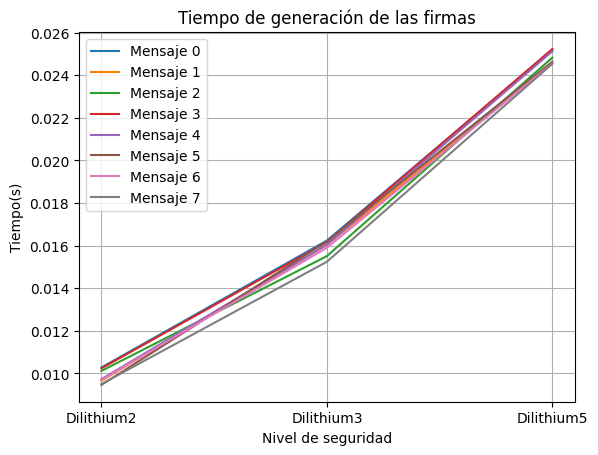

In [25]:
import matplotlib.pyplot as plt
for i in range(len(llaves)):
    plt.plot(llaves[i],label=str("Mensaje ")+str(i))
plt.grid()
seguridad=["Dilithium2","Dilithium3","Dilithium5"]
plt.xticks(range(0,3,1),seguridad)
plt.xlabel("Nivel de seguridad")
plt.ylabel("Tiempo(s)")
plt.title("Tiempo de generación de las firmas")
plt.legend()
plt.show()

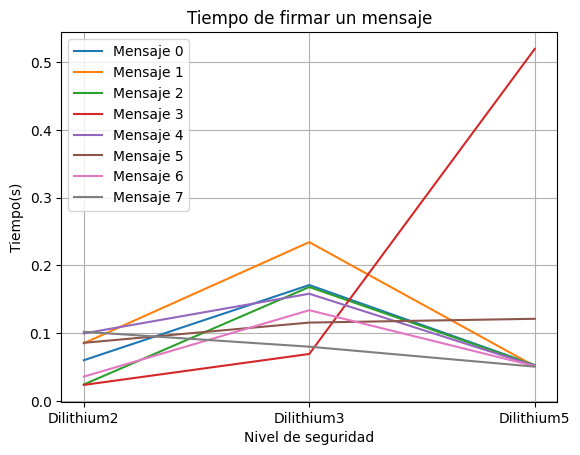

In [26]:
import matplotlib.pyplot as plt
for i in range(len(firmas)):
    plt.plot(firmas[i],label=str("Mensaje ")+str(i))
plt.grid()
plt.xticks(range(0,3,1),seguridad)
plt.xlabel("Nivel de seguridad")
plt.ylabel("Tiempo(s)")
plt.title("Tiempo de firmar un mensaje")
plt.legend()
plt.show()

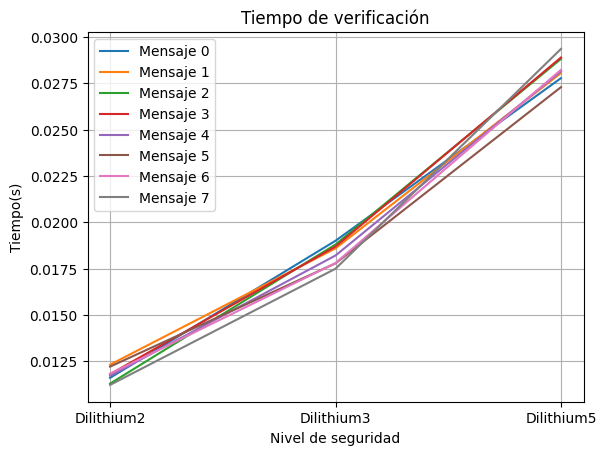

In [27]:
for i in range(len(verificacion)):
    plt.plot(verificacion[i],label=str("Mensaje ")+str(i))
plt.grid()
plt.xticks(range(0,3,1),seguridad)
plt.xlabel("Nivel de seguridad")
plt.ylabel("Tiempo(s)")
plt.title("Tiempo de verificación")
plt.legend()
plt.show()

In [35]:
llaves_pruebas=[]
firmas_pruebas=[]
verificacion_pruebas=[]
#for i in range(len(mensajes)):
Cantidad_de_pruebas=500

llave_tiempo       =[]
firma_tiempo       =[]
verificacion_tiempo=[]
for i in range(Cantidad_de_pruebas):
    #print("***********************************************************")
    #print("\t\t\t Para el mensaje número ",i)
    #print(mensajes[i])

    inicio=time.time()
    pk,sk = Dilithium2.keygen()
    fin=time.time()
    llave_tiempo.append(-inicio+fin)
    #print("El tiempo que tomó la generación de las llaves: ",-inicio+fin)
        
    inicio=time.time()
    sig = Dilithium2.sign(sk, b"Hola")
    fin=time.time()
    firma_tiempo.append(-inicio+fin)
    #print("El tiempo que tomó firmar el mensaje: ",-inicio+fin)
        
    inicio=time.time()
    veri=Dilithium2.verify(pk, b"Hola", sig)
    if veri==False:
        print("La verificación falló")
        break
    fin=time.time()
    verificacion_tiempo.append(-inicio+fin)
    #print("La verificación fue: ",veri)
    #print("El tiempo de la verificación fue de: ",-inicio+fin)
print("Prueba terminada con el nivel de seguridad Dilithium 2")
llaves_pruebas.append(llave_tiempo)
firmas_pruebas.append(firma_tiempo)
verificacion_pruebas.append(verificacion_tiempo)    
       

llave_tiempo       =[]
firma_tiempo       =[]
verificacion_tiempo=[]
for i in range(Cantidad_de_pruebas):


    inicio=time.time()
    pk,sk = Dilithium3.keygen()
    fin=time.time()
    llave_tiempo.append(-inicio+fin)
    #print("El tiempo que tomó la generación de las llaves: ",-inicio+fin)
        
    inicio=time.time()
    sig = Dilithium3.sign(sk, b"Hola")
    fin=time.time()
    firma_tiempo.append(-inicio+fin)
    #print("El tiempo que tomó firmar el mensaje: ",-inicio+fin)
        
    inicio=time.time()
    veri=Dilithium3.verify(pk, b"Hola", sig)
    if veri==False:
        print("La verificación falló")
        break
    fin=time.time()
    verificacion_tiempo.append(-inicio+fin)
    #print("La verificación fue: ",veri)
    #print("El tiempo de la verificación fue de: ",-inicio+fin)
print("Prueba terminada con el nivel de seguridad Dilithium 3")
llaves_pruebas.append(llave_tiempo)
firmas_pruebas.append(firma_tiempo)
verificacion_pruebas.append(verificacion_tiempo) 


llave_tiempo       =[]
firma_tiempo       =[]
verificacion_tiempo=[]
for i in range(Cantidad_de_pruebas):

    inicio=time.time()
    pk,sk = Dilithium5.keygen()
    fin=time.time()
    llave_tiempo.append(-inicio+fin)
    #print("El tiempo que tomó la generación de las llaves: ",-inicio+fin)
        
    inicio=time.time()
    sig = Dilithium5.sign(sk, b"Hola")
    fin=time.time()
    firma_tiempo.append(-inicio+fin)
    #print("El tiempo que tomó firmar el mensaje: ",-inicio+fin)
        
    inicio=time.time()
    veri=Dilithium5.verify(pk, b"Hola", sig)
    if veri==False:
        print("La verificación falló")
        break
    fin=time.time()
    verificacion_tiempo.append(-inicio+fin)
    #print("La verificación fue: ",veri)
    #print("El tiempo de la verificación fue de: ",-inicio+fin)
print("Prueba terminada con el nivel de seguridad Dilithium 5")
llaves_pruebas.append(llave_tiempo)
firmas_pruebas.append(firma_tiempo)
verificacion_pruebas.append(verificacion_tiempo) 

Prueba terminada con el nivel de seguridad Dilithium 2
Prueba terminada con el nivel de seguridad Dilithium 3
Prueba terminada con el nivel de seguridad Dilithium 5


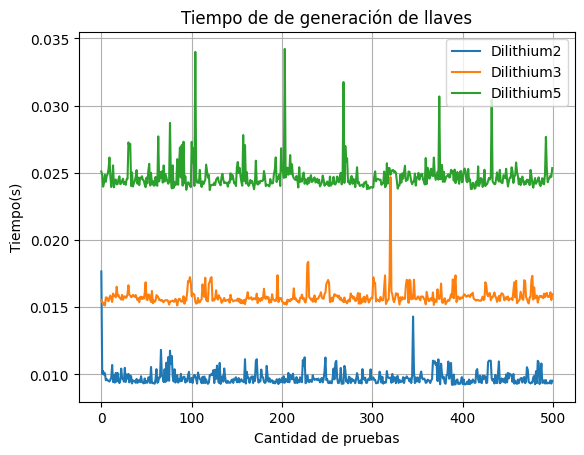

In [39]:
for i in range(len(llaves_pruebas)):
    plt.plot(llaves_pruebas[i],label=str(seguridad[i]))
plt.grid()
#plt.xticks(range(0,3,1),seguridad)
plt.xlabel("Cantidad de pruebas")
plt.ylabel("Tiempo(s)")
plt.title("Tiempo de de generación de llaves")
plt.legend()
plt.show()

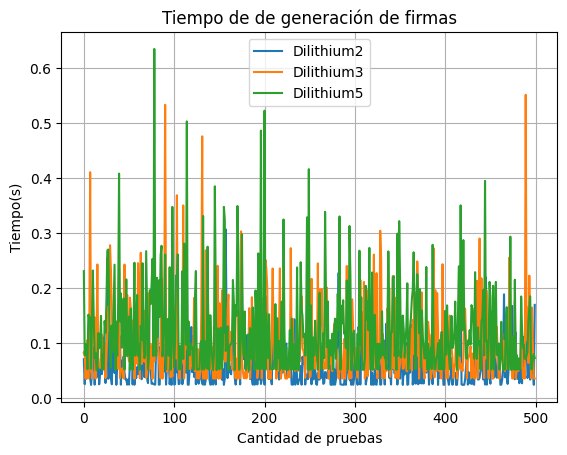

In [40]:
for i in range(len(firmas_pruebas)):
    plt.plot(firmas_pruebas[i],label=str(seguridad[i]))
plt.grid()
#plt.xticks(range(0,3,1),seguridad)
plt.xlabel("Cantidad de pruebas")
plt.ylabel("Tiempo(s)")
plt.title("Tiempo de de generación de firmas")
plt.legend()
plt.show()

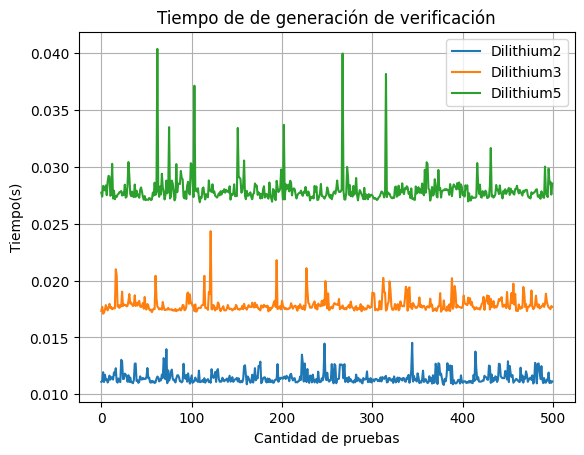

In [41]:
for i in range(len(verificacion_pruebas)):
    plt.plot(verificacion_pruebas[i],label=str(seguridad[i]))
plt.grid()
#plt.xticks(range(0,3,1),seguridad)
plt.xlabel("Cantidad de pruebas")
plt.ylabel("Tiempo(s)")
plt.title("Tiempo de de generación de verificación")
plt.legend()
plt.show()

In [55]:
import numpy as np
for i in range(len(seguridad)):
    print("El promedio de generación de llaves para ",str(seguridad[i]),np.mean(llaves_pruebas[i]))
    print("El promedio para firmar el mensaje",str(seguridad[i]),np.mean(firmas_pruebas[i]))
    print("El promedio de la verificacion ",str(seguridad[i]),np.mean(verificacion_pruebas[i]))
    print("**********************************************************************")

El promedio de generación de llaves para  Dilithium2 0.009749396800994873
El promedio para firmar el mensaje Dilithium2 0.05949838399887085
El promedio de la verificacion  Dilithium2 0.011458075523376465
**********************************************************************
El promedio de generación de llaves para  Dilithium3 0.01577832841873169
El promedio para firmar el mensaje Dilithium3 0.09891135931015015
El promedio de la verificacion  Dilithium3 0.017853807926177977
**********************************************************************
El promedio de generación de llaves para  Dilithium5 0.02469535207748413
El promedio para firmar el mensaje Dilithium5 0.12398930978775025
El promedio de la verificacion  Dilithium5 0.02795021390914917
**********************************************************************


In [47]:
import csv
import numpy as np

# Crear una matriz de ejemplo 3x500
matriz = np.random.randint(1, 1000, size=(3, 500))

# Agregar títulos de columnas
titulos = ["Dilithium 2", "Dilithium 3", "Dilithium 5"]

# Nombre del archivo CSV
archivo_csv = "llaves_pruebas.csv"

# Guardar la matriz en el archivo CSV
with open(archivo_csv, mode='w', newline='') as archivo:
    escritor_csv = csv.writer(archivo)
    
    # Escribir títulos de columnas
    escritor_csv.writerow(titulos)
    
    # Escribir datos por columnas
    for i in range(500):
        fila = [llaves_pruebas[j][i] for j in range(3)]
        escritor_csv.writerow(fila)



In [48]:
import csv
import numpy as np

# Crear una matriz de ejemplo 3x500
matriz = np.random.randint(1, 1000, size=(3, 500))

# Agregar títulos de columnas
titulos = ["Dilithium 2", "Dilithium 3", "Dilithium 5"]

# Nombre del archivo CSV
archivo_csv = "firmas_pruebas.csv"

# Guardar la matriz en el archivo CSV
with open(archivo_csv, mode='w', newline='') as archivo:
    escritor_csv = csv.writer(archivo)
    
    # Escribir títulos de columnas
    escritor_csv.writerow(titulos)
    
    # Escribir datos por columnas
    for i in range(500):
        fila = [firmas_pruebas[j][i] for j in range(3)]
        escritor_csv.writerow(fila)


In [49]:
import csv
import numpy as np

# Crear una matriz de ejemplo 3x500
matriz = np.random.randint(1, 1000, size=(3, 500))

# Agregar títulos de columnas
titulos = ["Dilithium 2", "Dilithium 3", "Dilithium 5"]

# Nombre del archivo CSV
archivo_csv = "verificacion_pruebas.csv"

# Guardar la matriz en el archivo CSV
with open(archivo_csv, mode='w', newline='') as archivo:
    escritor_csv = csv.writer(archivo)
    
    # Escribir títulos de columnas
    escritor_csv.writerow(titulos)
    
    # Escribir datos por columnas
    for i in range(500):
        fila = [verificacion_pruebas[j][i] for j in range(3)]
        escritor_csv.writerow(fila)
